<a href="https://colab.research.google.com/github/arpit5220/Cat-vs-Dog-Image-Classifier-Using-Deep-Learning-Project/blob/main/Dog_vs_Cat_classifier_using_Transfer_Learning(Deep_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# installing the Kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c dogs-vs-cats

 98% 795M/812M [00:04<00:00, 214MB/s]
100% 812M/812M [00:04<00:00, 204MB/s]


In [6]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [7]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [9]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [10]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.5159.jpg', 'cat.4869.jpg', 'cat.6287.jpg', 'cat.4140.jpg', 'cat.7473.jpg', 'cat.7708.jpg', 'cat.9746.jpg', 'dog.10648.jpg', 'cat.9488.jpg', 'dog.6925.jpg', 'cat.2023.jpg', 'cat.2067.jpg', 'cat.4734.jpg', 'dog.3496.jpg', 'dog.7765.jpg', 'dog.1560.jpg', 'dog.174.jpg', 'cat.10510.jpg', 'cat.6041.jpg', 'cat.10383.jpg', 'dog.429.jpg', 'dog.1104.jpg', 'dog.6480.jpg', 'dog.7422.jpg', 'cat.8339.jpg', 'dog.8490.jpg', 'dog.1128.jpg', 'dog.11297.jpg', 'cat.3558.jpg', 'cat.4831.jpg', 'cat.4311.jpg', 'cat.3760.jpg', 'dog.6678.jpg', 'cat.2635.jpg', 'dog.10873.jpg', 'cat.552.jpg', 'dog.6220.jpg', 'cat.4452.jpg', 'dog.5030.jpg', 'dog.3626.jpg', 'cat.8091.jpg', 'dog.9545.jpg', 'cat.2848.jpg', 'cat.791.jpg', 'cat.4522.jpg', 'cat.2638.jpg', 'dog.9447.jpg', 'cat.6560.jpg', 'cat.7394.jpg', 'cat.5153.jpg', 'cat.7299.jpg', 'cat.8475.jpg', 'dog.6026.jpg', 'cat.8148.jpg', 'cat.117.jpg', 'cat.1445.jpg', 'cat.11986.jpg', 'cat.7351.jpg', 'dog.12422.jpg', 'cat.5953.jpg', 'dog.2615.jpg', 'cat.400.jpg', 'cat.2

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow 

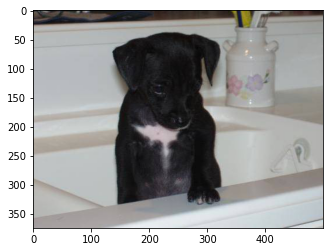

In [12]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

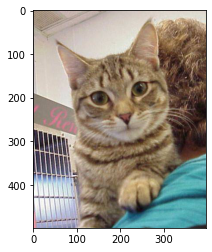

In [15]:
# display cat image
img = mpimg.imread('/content/train/cat.5159.jpg')
imgplt = plt.imshow(img)
plt.show()

In [18]:
file_names = os.listdir('/content/train/')

for i in range(10):

  name = file_names[i] 
  print(name[0:8])

cat.5159
cat.4869
cat.6287
cat.4140
cat.7473
cat.7708
cat.9746
dog.1064
cat.9488
dog.6925


In [19]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [20]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [21]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

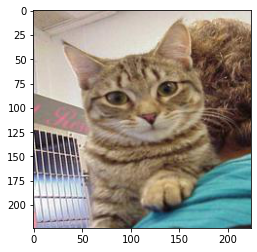

In [27]:
# display resized dog image
img = mpimg.imread('/content/image resized/cat.5159.jpg')
imgplt = plt.imshow(img)
plt.show()

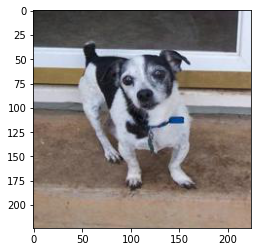

In [29]:
# display resized cat image
img = mpimg.imread('/content/image resized/dog.10648.jpg')
imgplt = plt.imshow(img)
plt.show()

In [30]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [33]:
print(filenames[0:10])
print(len(filenames))

['cat.5159.jpg', 'cat.4869.jpg', 'cat.6287.jpg', 'cat.4140.jpg', 'cat.7473.jpg', 'cat.7708.jpg', 'cat.9746.jpg', 'dog.10648.jpg', 'cat.9488.jpg', 'dog.6925.jpg']
2000


In [34]:
print(labels[0:10])
print(len(labels))

[0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
2000


In [35]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 972 1028]


In [36]:
import cv2
import glob

In [37]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [38]:
print(dog_cat_images)

[[[[128 142 161]
   [123 138 157]
   [123 138 157]
   ...
   [208 212 223]
   [208 212 223]
   [207 211 222]]

  [[121 135 154]
   [131 146 165]
   [131 146 165]
   ...
   [209 214 223]
   [209 213 224]
   [208 213 222]]

  [[136 150 169]
   [118 133 152]
   [118 133 152]
   ...
   [211 217 224]
   [210 215 224]
   [209 215 222]]

  ...

  [[168 151 242]
   [172 155 236]
   [174 155 218]
   ...
   [ 61  54  39]
   [ 55  49  36]
   [ 53  47  34]]

  [[177 156 241]
   [181 159 237]
   [182 157 217]
   ...
   [ 36  32  37]
   [ 33  29  35]
   [ 32  28  34]]

  [[172 149 233]
   [179 156 230]
   [181 156 214]
   ...
   [ 34  31  46]
   [ 32  29  45]
   [ 31  28  44]]]


 [[[138 166 177]
   [137 165 176]
   [136 164 175]
   ...
   [ 21  74 111]
   [ 20  73 110]
   [ 19  72 109]]

  [[141 169 180]
   [140 168 179]
   [139 167 178]
   ...
   [ 24  77 114]
   [ 23  76 113]
   [ 22  75 112]]

  [[145 173 184]
   [144 172 183]
   [143 171 182]
   ...
   [ 25  80 117]
   [ 24  79 116]
   [ 23  78

In [39]:
type(dog_cat_images)

numpy.ndarray

In [40]:
X = dog_cat_images
Y = np.asarray(labels)

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [43]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [44]:
import tensorflow as tf
import tensorflow_hub as hub

In [45]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [46]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [47]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [48]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 53s 963ms/step - loss: 0.1658 - acc: 0.9394
Epoch 2/5
50/50 [==============================] - 54s 1s/step - loss: 0.0703 - acc: 0.9794
Epoch 3/5
50/50 [==============================] - 48s 963ms/step - loss: 0.0517 - acc: 0.9881
Epoch 4/5
50/50 [==============================] - 48s 966ms/step - loss: 0.0424 - acc: 0.9887
Epoch 5/5
50/50 [==============================] - 48s 960ms/step - loss: 0.0400 - acc: 0.9887


In [49]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 13s 910ms/step - loss: 0.0567 - acc: 0.9800
Test Loss = 0.05671387165784836
Test Accuracy = 0.9800000190734863


Path of the image to be predicted: /content/dog.jpg


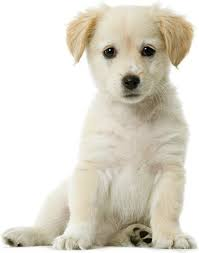

1/1 [==============================] - 1s 694ms/step
[[-2.842142  3.08748 ]]
1
The image represents a Dog


In [50]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

In [ ]:
#Path of the image to be predicted: /content/dog.jpg#

Path of the image to be predicted: /content/cat.jpg


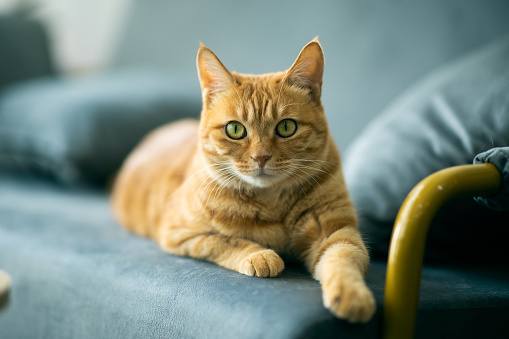

1/1 [==============================] - 0s 66ms/step
[[ 4.593689  -3.5656517]]
0
The image represents a Cat


In [51]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')